# Python Libraries



In [47]:
# Importar la función load_digits desde la librería sklearn.datasets
from sklearn.datasets import load_digits
# Importar la librería matplotlib para visualización
import matplotlib.pyplot as plt
# Importar la función train_test_split para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importar el clasificador KNeighborsClassifier de la librería sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Importar la libreria Numpy
import numpy as np
# Importar funciones para evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dataset

In [48]:
# Cargar el conjunto de datos "digits" que contiene imágenes de dígitos escritos a mano
digits = load_digits()

# Dataset documentation

In [49]:
# Imprimir la descripción del conjunto de datos
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Dimensions

In [50]:
# Mostrar la forma (dimensiones) de los datos de las imágenes y las etiquetas
digits.data.shape

(1797, 64)

In [51]:
# Mostrar la forma (dimensiones) de  las etiquetas
digits.target.shape

(1797,)

# Select a dataset element

In [52]:
# Mostrar los valores de los datos en la posición 15
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

# Data Preview

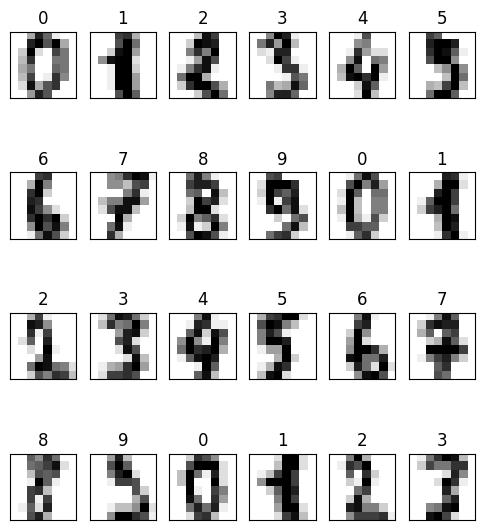

In [58]:
# Crear una cuadrícula de subplots para mostrar imágenes y etiquetas
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 7))

# Iterar sobre la cuadrícula de subplots y mostrar imágenes y etiquetas
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

In [10]:
# Ajustar el diseño de la visualización
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

# Split Test

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=11)

In [12]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape
X_test.shape

(450, 64)

# KNeighborsClassifier

In [13]:
# Crear un clasificador KNeighborsClassifier
knn = KNeighborsClassifier()

In [14]:
# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X=X_train, y=Y_train)


KNeighborsClassifier()

# Make predictions

In [15]:
# Realizar predicciones en el conjunto de prueba
prediccion = knn.predict(X=X_test)

# True Labels

In [16]:
# Etiquetas reales del conjunto de prueba
esperado = Y_test

# Comparison between Actual Values and Predictions

In [17]:
# Mostrar las primeras 20 predicciones
prediccion[:20]
# Mostrar las primeras 20 etiquetas reales
esperado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

# Confusion matrix

In [20]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(esperado, prediccion)

# Calcular las métricas
accuracy = accuracy_score(esperado, prediccion)
precision = precision_score(esperado, prediccion, average='weighted')
recall = recall_score(esperado, prediccion, average='weighted')
f1 = f1_score(esperado, prediccion, average='weighted')

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Matriz de Confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


Matriz de Confusión:

Los valores en la diagonal principal nos muestran las clasificaciones correctas para cada clase.
Los valores fuera de la diagonal principal representan las clasificaciones incorrectas.

Accuracy (Precisión): 0.98

El 98% de todas las muestras fueron clasificadas correctamente.

Precision: 0.98

Para cada clase, en promedio, el 98% de las muestras clasificadas como positivas son realmente positivas. En otras palabras, cuando el algoritmo predice que una muestra es de una cierta clase, en el 98% de los casos esa predicción es correcta.

Recall (Sensibilidad): 0.98

Para cada clase, en promedio, el 98% de las muestras positivas fueron correctamente identificadas por el algoritmo. Asi mismo, éste logra capturar el 98% de las muestras que realmente pertenecen a una clase.
F1-score: 0.98

El F1-score es una métrica que combina tanto la precisión como el recall en una sola medida. Un F1-score alto indica un buen equilibrio entre precisión y recall.